# 음료수 얼려 먹기

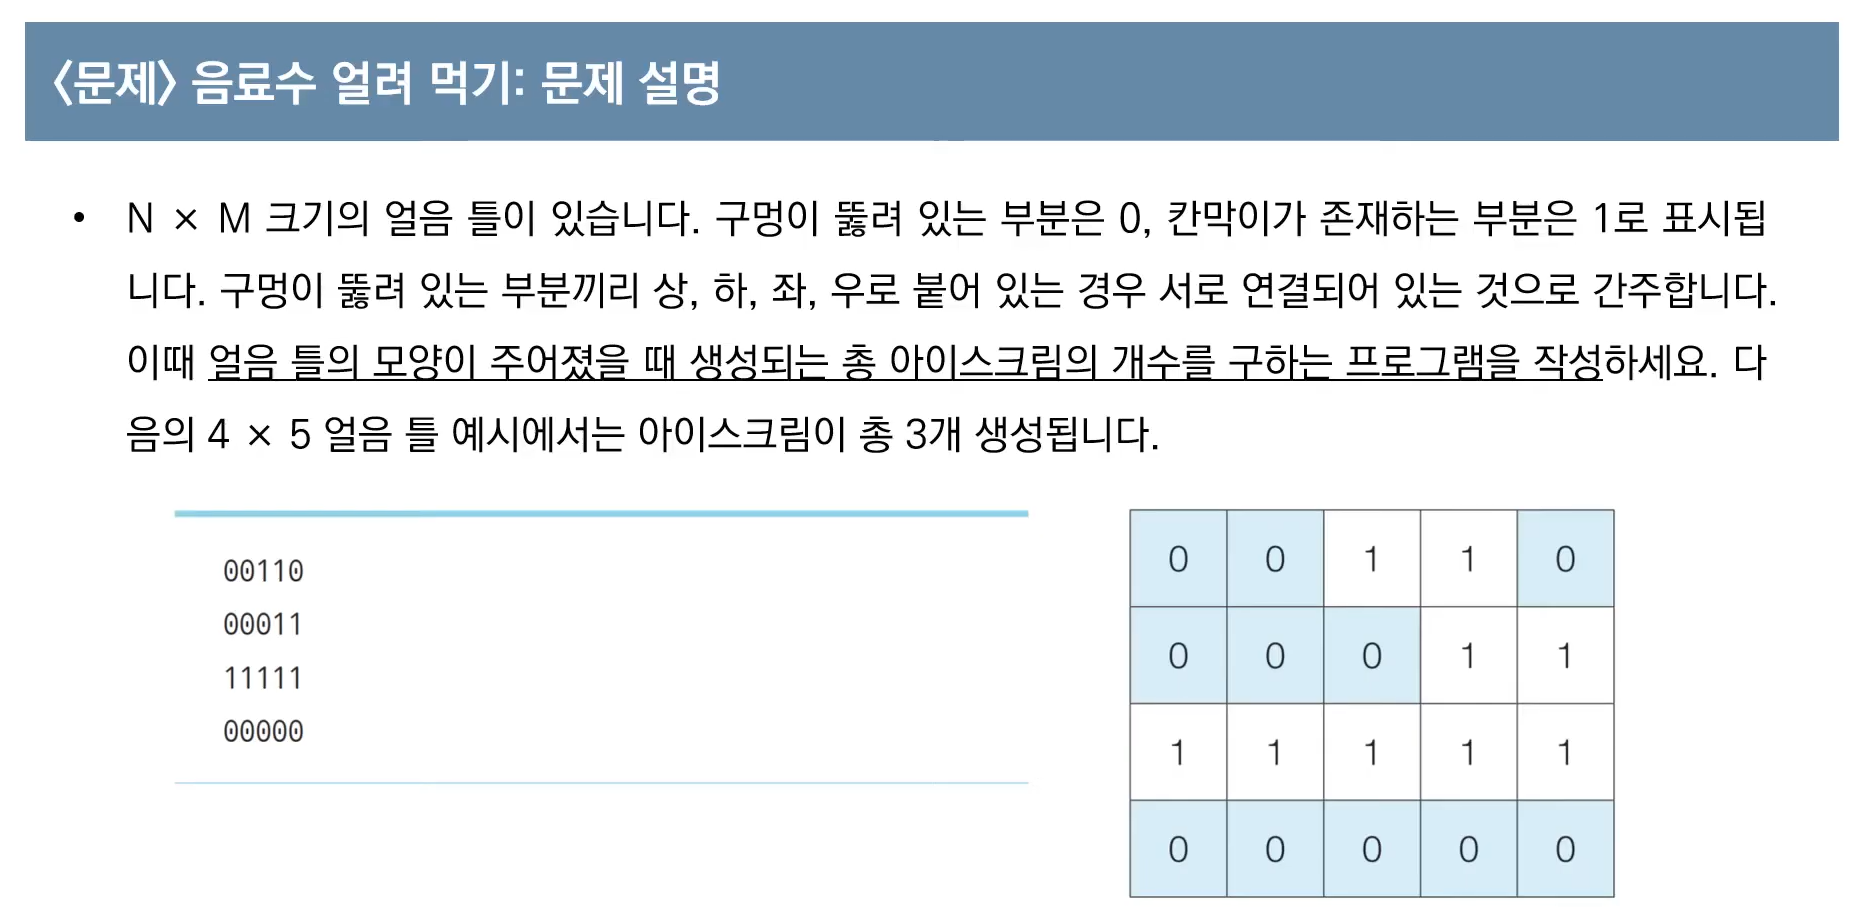
- 출처 : 이것이 코딩테스트다 with Python

## 아이디어

DFS로 해결할 수 있다.  

얼음을 얼릴 수 있는 공간이 상하좌우로 연결되어 있다고 표현할 수 있기 때문에 그래프 형태로 모델링할 수 있다.

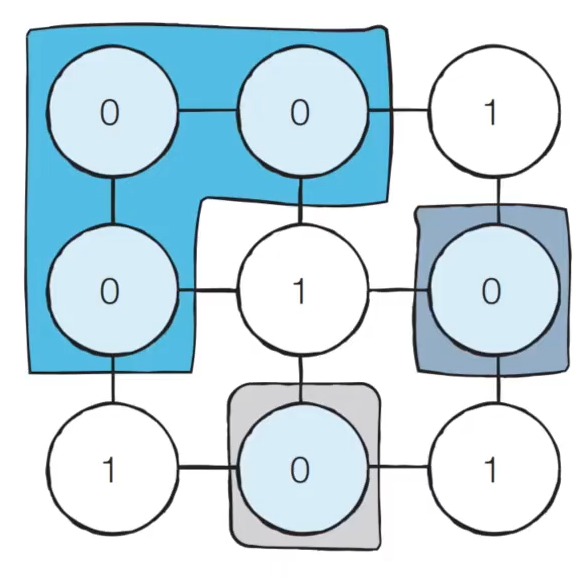

**DFS 알고리즘 활용 방법**
1. 특정한 지점의 주변 상하좌우를 살펴본 뒤에 주변 지점 중에서 값이 0이면서 아직 방문하지 않은 지점이 있다면 해당 지점 방문 

2. 방문한 지점에서 다시 상하좌우를 살펴보면서 방문을 진행하는 과정을 반복하면 연결된 모든 지점을 방문할 수 있음 

3. 모든 노드에 대해서 1~2의 과정을 반복하며 방문하지 않은 지점의 수를 센다.

## solution

In [6]:
# dfs 정의
def dfs(x, y) : 
    if x < 0 or x >= n or y < 0 or y >= m : 
        return False 
    
    # 현재 노드를 방문하지 않았다면 
    if graph[x][y] == 0 : 
        # 방문처리를 한 후에
        graph[x][y] = 1 
        # 상하좌우의 위치들도 재귀적으로 호출 
        dfs(x-1, y)
        dfs(x+1, y)
        dfs(x, y-1)
        dfs(x, y+1)
        return True 
    return False

n, m = map(int, input().split())

# graph 생성
graph = [] 
for i in range(n) : 
    graph.append(list(map(int, input())))
    
# 모든 노드에 대하여 음료수 채우기
answer = 0 
for i in range(n) : 
    for j in range(m) : 
        # 현재 위치에서 dfs 수행 
        if dfs(i, j) :
            answer += 1 


print(answer)

3 3
001
010
101
3


In [11]:
def dfs(x, y) : 
    if x < 0 or x >= n or y < 0 or y >= m : 
        return False 
    
    if graph[x][y] == 0 : 
        graph[x][y] = 1 
        dfs(x-1, y)
        dfs(x+1, y)
        dfs(x, y-1)
        dfs(x, y+1)
        return True 
    return False 

n, m = map(int, input().split()) 
graph = [] 
answer = 0 
for _ in range(n) :
    graph.append(list(map(int, input())))
    
for i in range(n) : 
    for j in range(m) : 
        if dfs(i, j) : 
            answer += 1 
print(answer)

3 3
001
010
101
3


# 미로 탈출

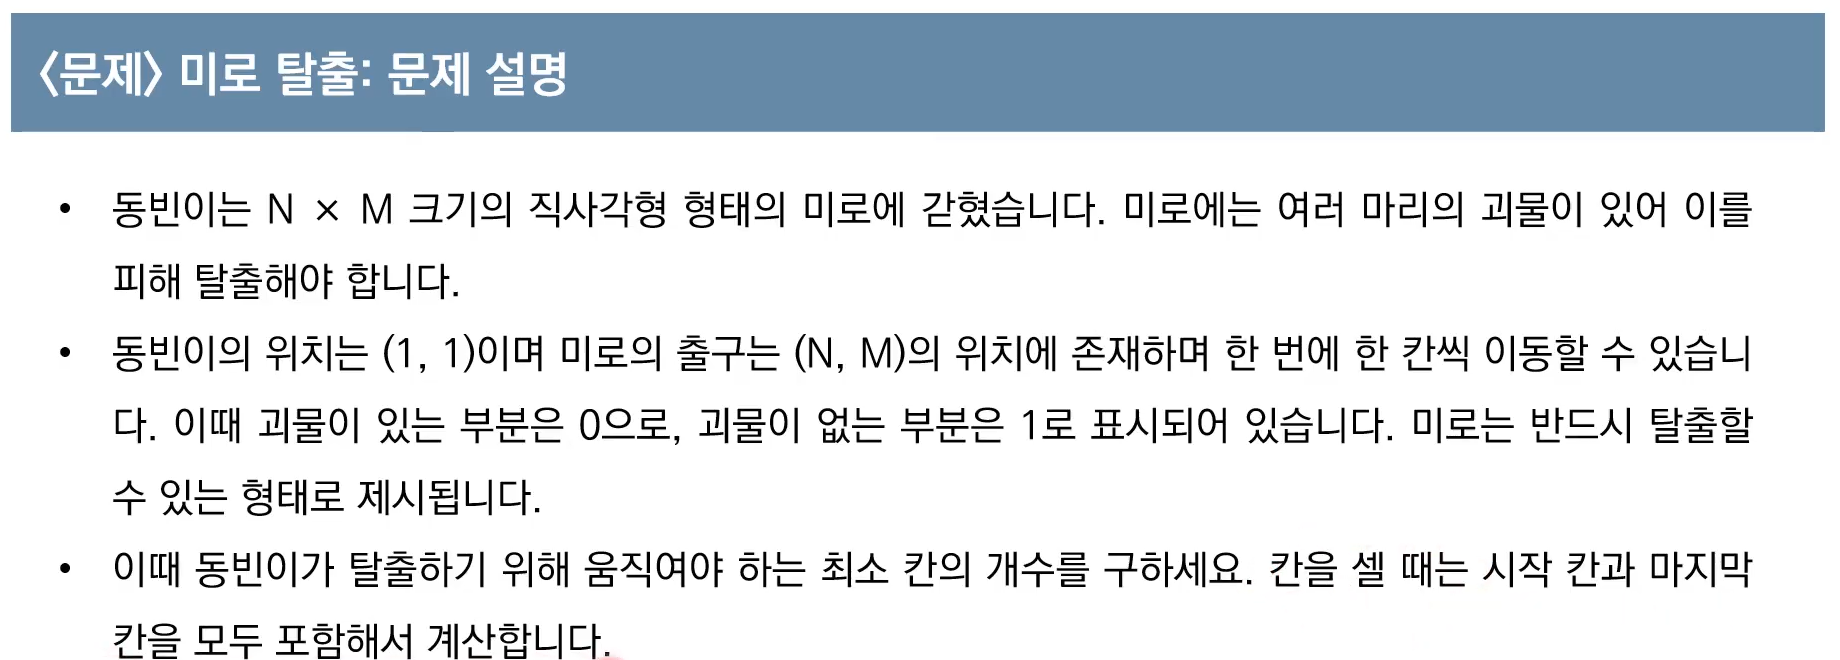

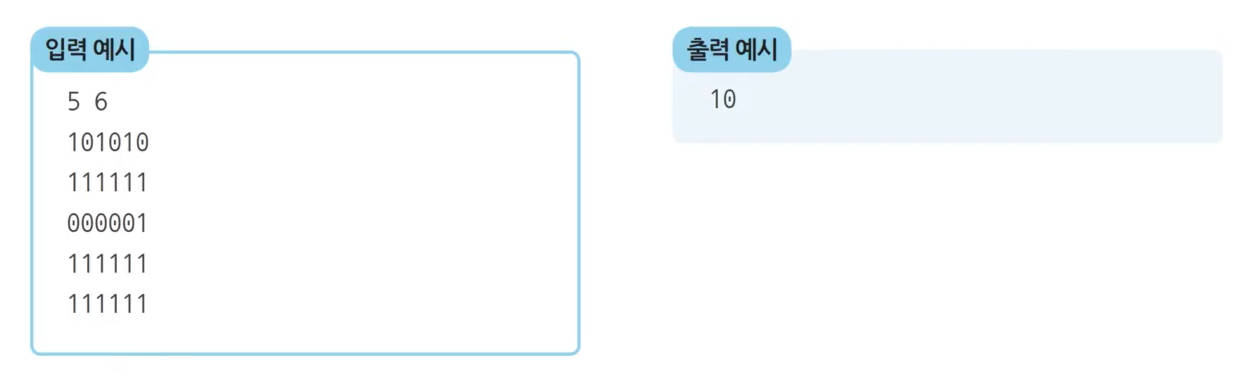

## 아이디어


BFS를 사용해서 풀 수 있다. BFS는 시작 지점에서 가까운 노드부터 차례대로 그래프의 모든 노드를 탐색한다. 

상하좌우로 연결된 모든 노드로의 거리가 1로 동일하다. 
- 따라서 (1, 1) 지점부터 BFS를 수행하여 모든 노드의 최단 거리 값을 기록하면 해결할 수 있다.

ex.

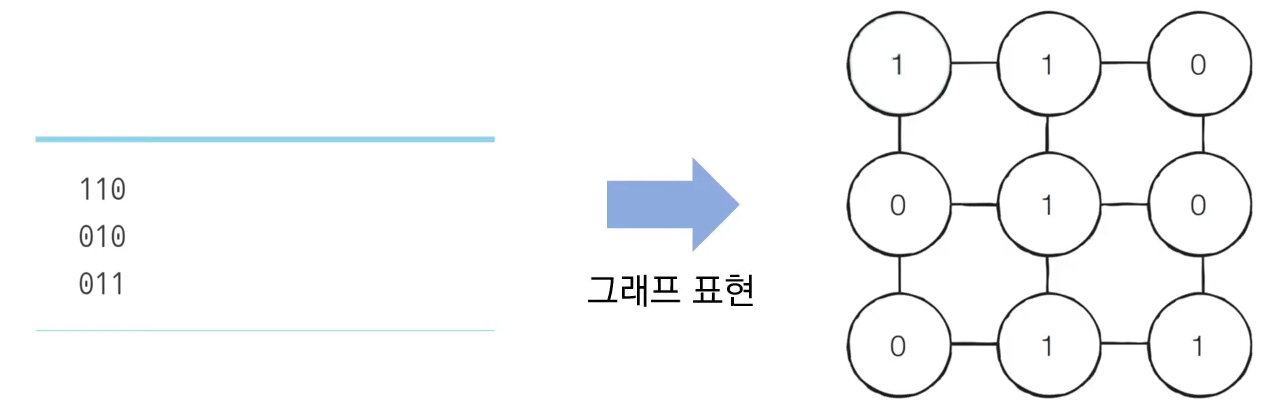

**step 1.** (1, 1)위치에서 시작
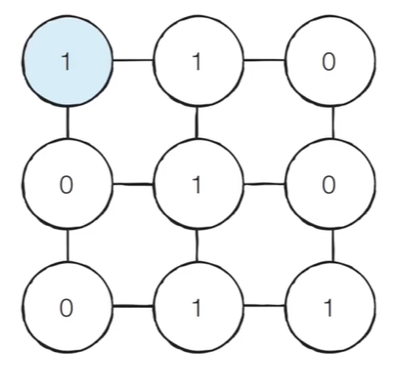

**step 2.** (1, 1) 좌표에서 상하좌우로 탐색을 진행하면 바로 옆 노드인 (1, 2)위치의 노드를 방문하게 되고 새롭게 방문하게 되는 노드의 값을 2로 바꾸게 된다. 
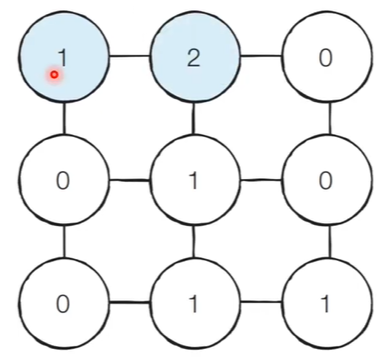

**step 3.** BFS를 계속 수행하면 최단 경로의 값들이 1씩 증가하는 형태로 바뀐다.
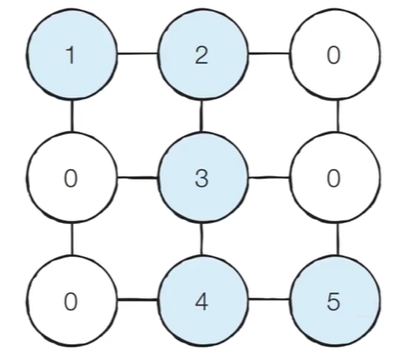

## solution

In [16]:
from collections import deque 

def bfs(x, y) : 
    dx = [-1, 1, 0, 0]
    dy = [0, 0, -1, 1]
    queue = deque()
    queue.append((x, y))
    
    while queue : 
        x, y = queue.popleft()
        for i in range(4) :
            nx = x + dx[i]
            ny = y + dy[i]
            
            # 공간을 벗어난 경우 무시
            if nx < 0 or nx >= n or ny < 0 or ny >= m : 
                continue 
                
            # 벽인 경우 무시
            if graph[nx][ny] == 0 : 
                continue
            
            # 처음 방문하는 경우에만 최단거리 기록 
            if graph[nx][ny] == 1 : 
                graph[nx][ny] = graph[x][y] + 1 
                queue.append((nx, ny))
    return graph[n-1][m-1]
            
n, m = map(int, input().split()) 

graph = [] 
for i in range(n) : 
    graph.append(list(map(int, input())))
    


print(bfs(0, 0))

5 6
101010
111111
000001
111111
111111
10


In [24]:
from collections import deque 

def bfs(x, y) : 
    queue = deque() 
    queue.append((x, y)) 
    dx, dy = [-1, 1, 0, 0], [0, 0, -1, 1]
    
    while queue : 
        x, y = queue.popleft()
        for i in range(4) : 
            nx = x + dx[i]
            ny = y + dy[i]
            
            if nx < 0 or nx >= n or ny < 0 or ny >= m : 
                continue 
                
            if graph[nx][ny] == 0 : 
                continue 
                
            if graph[nx][ny] == 1 : 
                graph[nx][ny] = graph[x][y] + 1 
                queue.append((nx, ny))
    return graph[n-1][m-1]

n, m = map(int, input().split()) 
graph = []
for _ in range(n) :
    graph.append(list(map(int, input())))
    
print(bfs(0, 0))

5 6
101010
111111
000001
111111
111111
10


In [25]:
graph

[[3, 0, 5, 0, 7, 0],
 [2, 3, 4, 5, 6, 7],
 [0, 0, 0, 0, 0, 8],
 [14, 13, 12, 11, 10, 9],
 [15, 14, 13, 12, 11, 10]]